<a href="https://colab.research.google.com/github/nhuyen183/LungCancerSupportSystem/blob/master/ITDSIU18048_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are given a file `appl_stock.csv`, please carry out the following tasks:

1. Read this file by PySpark. Print out the schema.
2. Create columns of `day of month`, `hour`, `day of year`, `month` from the column `Date` of the data.
3. Using `groupby` and `year()` function to compute the average closing price per year.

In [1]:
#@title Installing Spark and dependencies
#Java 8
#Apache Spark with hadoop and
#Findspark (used to locate the spark in the system)
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

#Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [2]:
import pandas as pd

In [3]:
#@title Create Spark entry points
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

sc = SparkContext(conf=SparkConf())
spark = SparkSession(sparkContext=sc)

In [ ]:
#@title 1.Read this file by PySpark. Print out the schema.
stock_data = spark.read.csv('./appl_stock.csv', inferSchema=True, header=True)

# preview the data
# data type
print('-'*10, 'data types', '-'*10)
pd.DataFrame(stock_data.dtypes)

In [ ]:
stock_data.printSchema()

In [ ]:
stock_data.show(6)

In [ ]:
#@title 2.Create columns of day of month, hour, day of year, month from the column Date of the data.
import pyspark.sql.functions as f
stock_data = stock_data.withColumn('Day of Month',f.dayofmonth(f.to_timestamp('Date', 'yyyy-MM-dd')))\
                       .withColumn('Hour',f.hour(f.to_timestamp('Date', 'yyyy-MM-dd')))\
                       .withColumn('Day of Year',f.dayofyear(f.to_timestamp('Date', 'yyyy-MM-dd')))\
                       .withColumn('Month',f.month(f.to_timestamp('Date', 'yyyy-MM-dd')))

stock_data.show()

In [ ]:
#@title 3.Using groupby and year() function to compute the average closing price per year.
stock_data.groupBy(f.year(f.to_timestamp('Date', 'yyyy-MM-dd'))).avg('Close').show(6)

## Exercise 2 (50 points)

1. Incrementally calculate the mean `base_salary` of all CSVs in `/payroll-small/` using pandas. Time the entire computation using `%%time` as the first line of the cell. Do not use any Dask functions.
2. Load all the payroll CSVs using `dask.read_csv` and assign it to payroll. Calculate the number of partitions in the DataFrame.
3. Calculate the mean of the `payroll.base_salary` Dask DataFrame. How do the timings compare for the Dask and Pandas versions.


In [5]:
import os
from glob import glob

import dask.dataframe as dd
import pandas as pd

In [6]:
# Uncomment the following lines if you want to use the distributed scheduler
# from dask.distributed import Client
# client = Client()

In [7]:
!unzip payroll-small.zip

Archive:  payroll-small.zip
  inflating: payroll-small/payroll_2018.csv  
  inflating: payroll-small/payroll_2019.csv  
  inflating: payroll-small/payroll_2017.csv  


In [8]:
payroll_glob = glob("./payroll-small/*.csv")
appended_data = []  # create a list
for f in payroll_glob:
    df = pd.read_csv(f, index_col=None)
appended_data.append(df)  # append to the list
payroll_glob = pd.concat(appended_data, axis=0)

__Exercise__ 

Incrementally calculate the mean `base_salary` of all CSVs in `/payroll-small/` using `pandas`. Time the entire computation using `%%time` as the first line of the cell.

Do not use any Dask functions.

In [9]:
!ls ./payroll-small/

payroll_2017.csv  payroll_2018.csv  payroll_2019.csv


In [10]:
%%time
payroll_glob.head(5)

CPU times: user 303 µs, sys: 54 µs, total: 357 µs
Wall time: 363 µs


,fiscal_year,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,DEPT OF ED PARA PROFESSIONALS,2004-10-05,MANHATTAN,ANNUAL ED PARA,CEASED,41841.00,per Annum,0.0,6857.28,0.0,0.00,0.00
1,2019,DEPT OF ED PER SESSION TEACHER,1996-10-16,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.0,740.60,0.0,0.00,0.00
2,2019,DEPT OF ED PARA PROFESSIONALS,1999-05-25,MANHATTAN,ANNUAL ED PARA,ACTIVE,39830.00,per Annum,0.0,51968.92,0.0,11.08,0.00
3,2019,DEPT OF ED PEDAGOGICAL,1998-11-23,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,115959.00,per Annum,0.0,120026.71,0.0,0.00,0.00
4,2019,DEPT OF ED PER SESSION TEACHER,2008-06-23,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,1539.61,0.0,0.00,2.03


In [11]:
payroll_glob.shape

(29622, 13)

In [12]:
%%time
payroll_glob_mean = payroll_glob['base_salary'].mean()
payroll_glob_mean

CPU times: user 2.55 ms, sys: 694 µs, total: 3.25 ms
Wall time: 3.14 ms


44601.998162514355

__Exercise__

Load all the payroll CSVs using `dd.read_csv` and assign it to `payroll`. Calculate the number of partitions in the DataFrame.

In [13]:
payroll = dd.read_csv("./payroll-small/*.csv")

In [14]:
payroll

,fiscal_year,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
npartitions=3,,,,,,,,,,,,,
,int64,object,object,object,object,object,float64,object,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [15]:
payroll.npartitions

3

In [16]:
payroll.head(compute=False)

,fiscal_year,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
npartitions=1,,,,,,,,,,,,,
,int64,object,object,object,object,object,float64,object,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...


We now have 4 tasks (3 partitions + 1 head task) that have not yet been evaluated.

__Exercise__

Calculate the mean of the `payroll.base_salary` Dask DataFrame. How do the timings compare for the Dask and Pandas versions.

In [17]:
%%time
payroll_dask_mean = payroll['base_salary'].mean().compute()
payroll_dask_mean

CPU times: user 152 ms, sys: 43.5 ms, total: 195 ms
Wall time: 132 ms


44387.192021095216

**Exercise**

Print out the task graph for the mean calculation from the previous exercise using visualize. Set rankdir="LR" to display the graph left-to-right.


/usr/local/lib/python3.8/dist-packages/dask/dataframe/core.py:1994: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meta = self._meta_nonempty.mean(axis=axis, skipna=skipna)


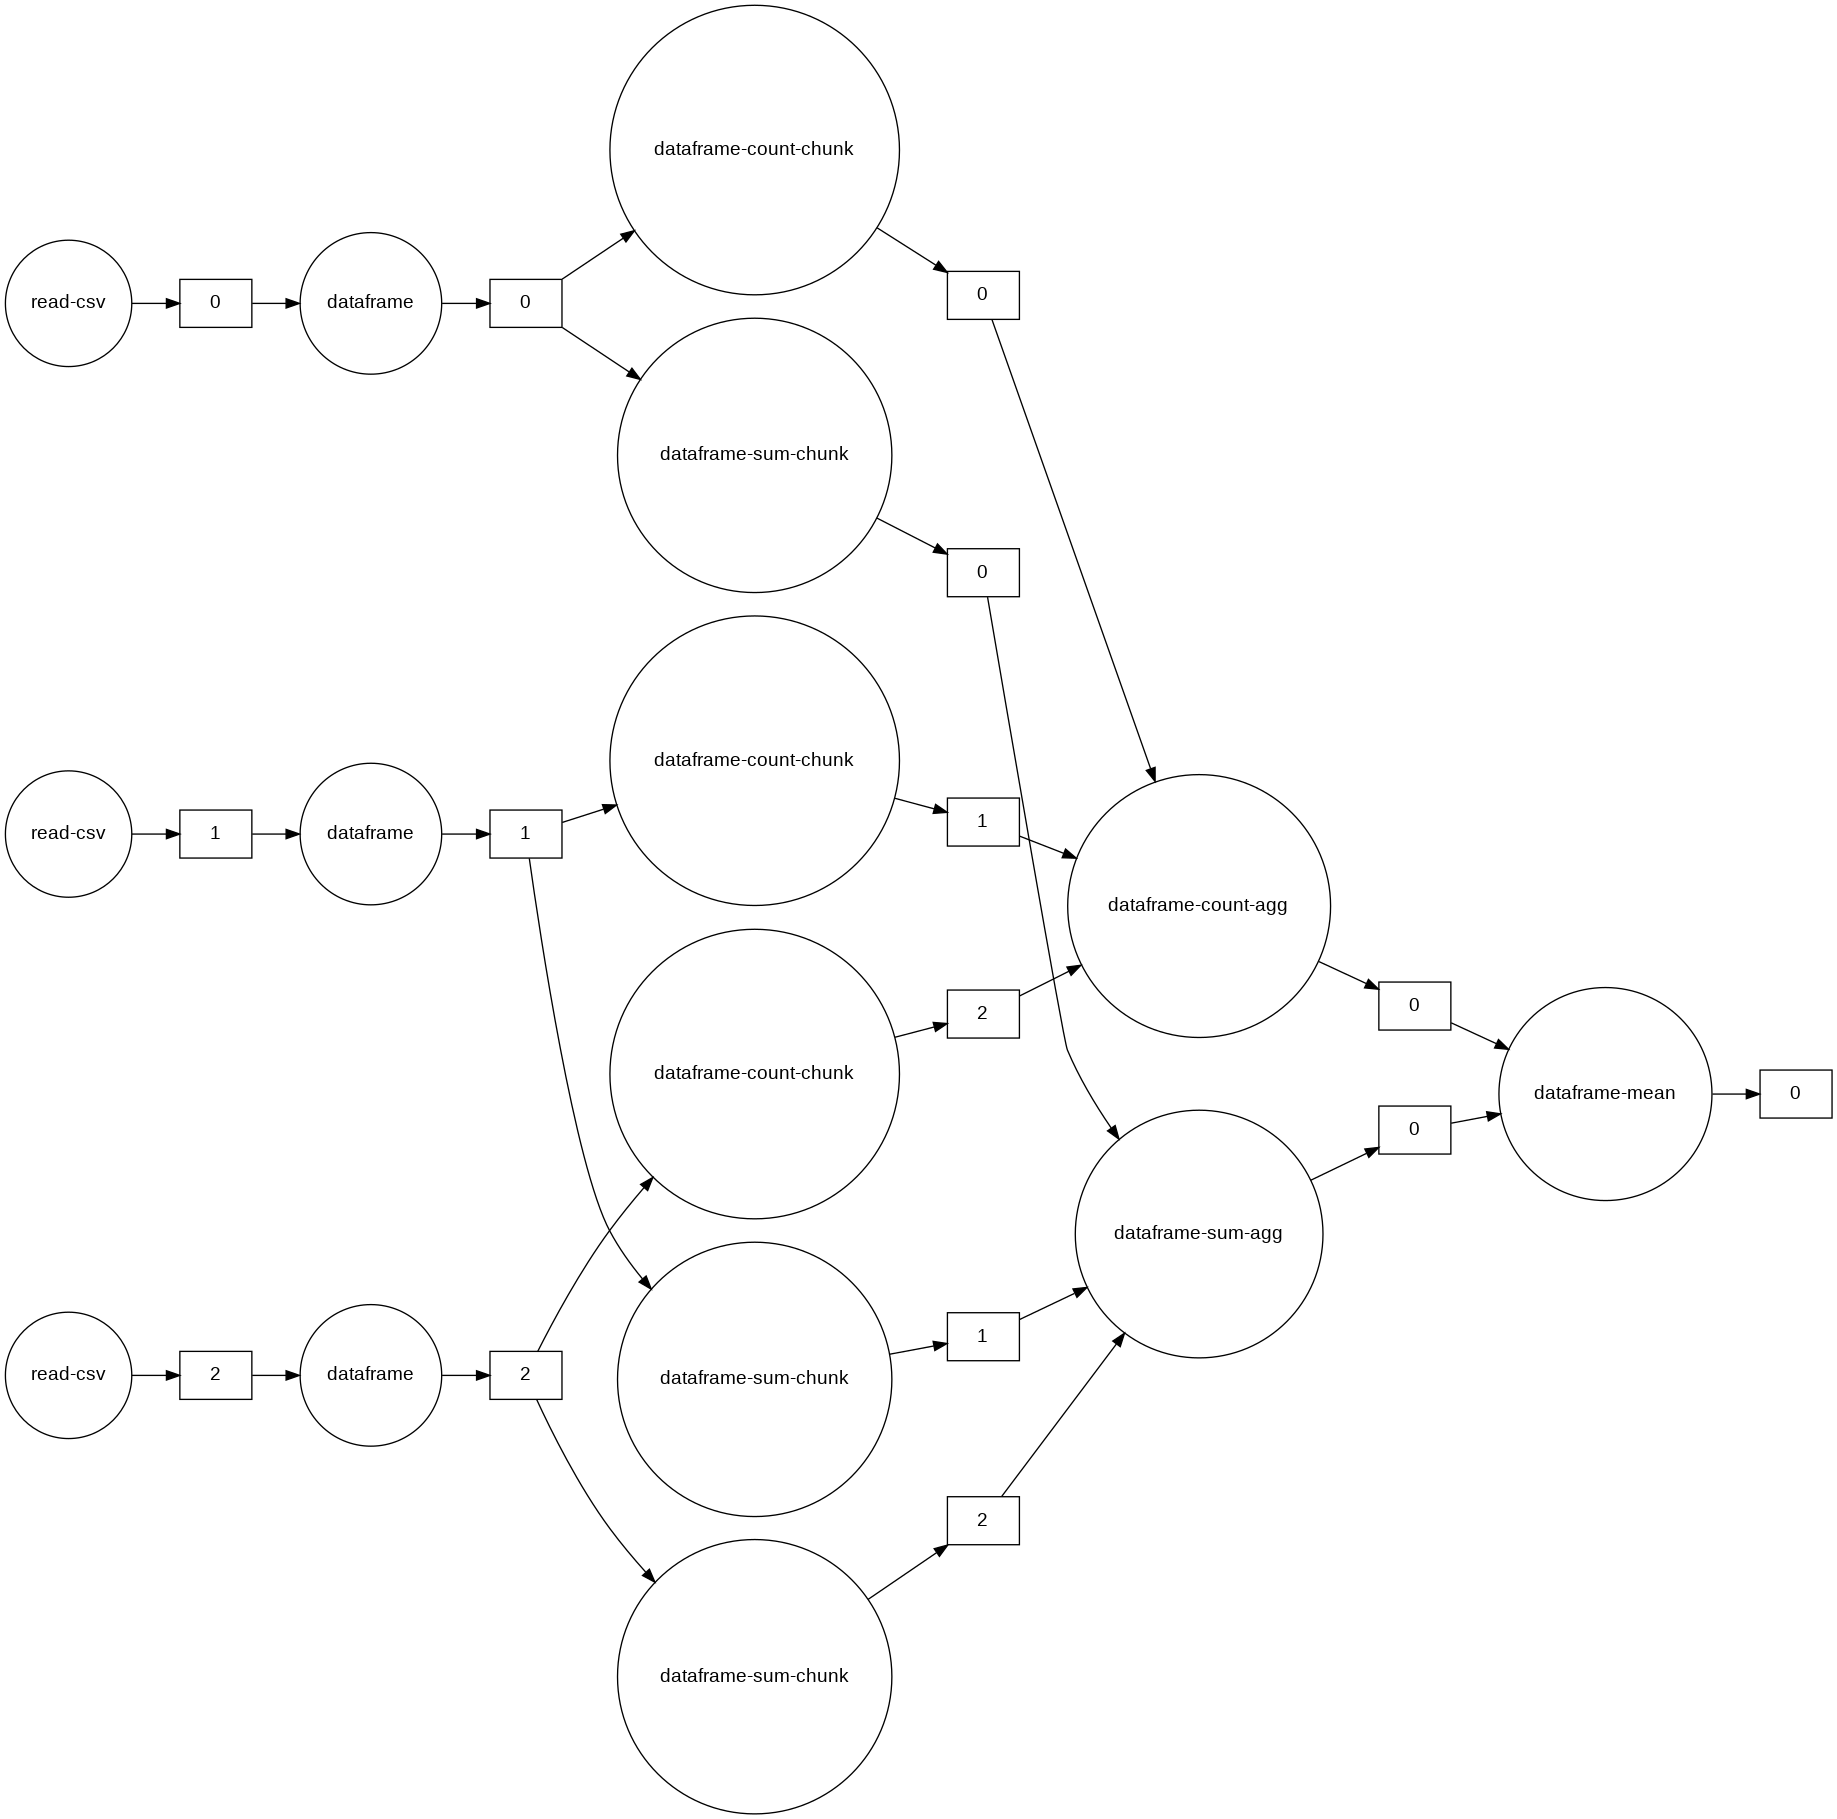

In [18]:
payroll.mean().visualize(rankdir="LR")

__Exercise__ 

Add a `max` calculation on `ot_hours` to the Dask graph but do not call `compute`. Why does the graph overlap with the previous one we visualize?

In [32]:
payroll_dask_max = payroll['ot_hours'].max()
payroll_dask_max

dd.Scalar<series-..., dtype=float64>

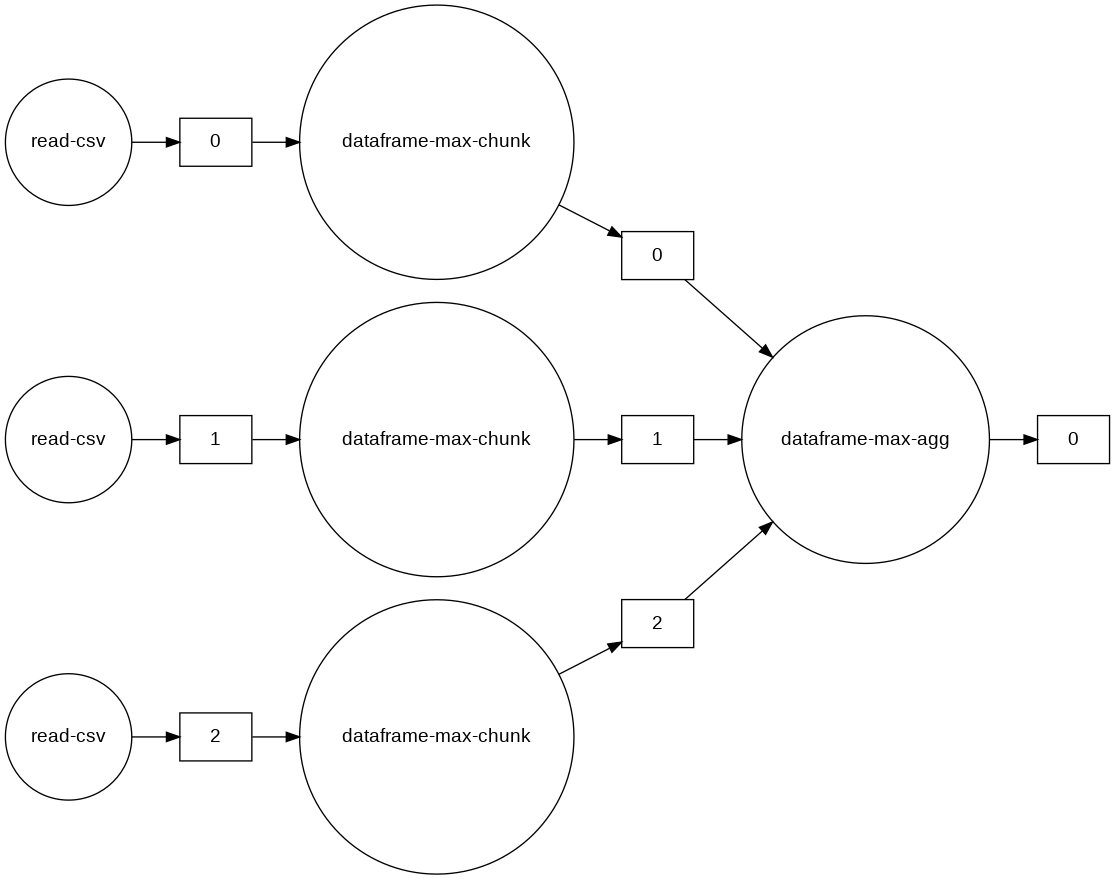

In [33]:
payroll.max().visualize(rankdir="LR")

__Exercise__ 

Call `persist` on `payroll` and visualize the result. Why is the new graph different from the previous one?

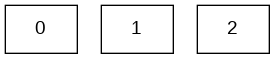

In [34]:
payroll.persist().visualize()